In [1]:
import glob #to read the files
import json #to work if .json
import numpy as np #to math
import pandas as pd #to save the data
import math #to convertion calculus
from astropy.time import Time #to time converting
from astropy import units #time correction
from astropy.coordinates import SkyCoord #time correction
from scipy import interpolate #to interpolate the wavelength and flux
from tabulate import tabulate #to export in table format
from scipy.interpolate import interp1d
import scipy.optimize as opt

def radec_to_xyz(ra, dec):
    x = math.cos(np.deg2rad(dec)) * math.cos(np.deg2rad(ra))
    y = math.cos(np.deg2rad(dec)) * math.sin(np.deg2rad(ra))
    z = math.sin(np.deg2rad(dec))

    return np.array([x, y, z], dtype=np.float64)

#functions from sncosmo
def cmb_dz(ra, dec):
    """See http://arxiv.org/pdf/astro-ph/9609034
     CMBcoordsRA = 167.98750000 # J2000 Lineweaver
     CMBcoordsDEC = -7.22000000
    """

    # J2000 coords from NED
    CMB_DZ = 371000. / 299792458.
    CMB_RA = 168.01190437
    CMB_DEC = -6.98296811
    CMB_XYZ = radec_to_xyz(CMB_RA, CMB_DEC)

    coords_xyz = radec_to_xyz(ra, dec)
    
    dz = CMB_DZ * np.dot(CMB_XYZ, coords_xyz)

    return dz

def cmb_to_helio(z, ra, dec):
    """Convert from CMB-frame redshift to heliocentric redshift.
    
    Parameters
    ----------
    z : float
        CMB-frame redshift.
    ra, dec: float
        RA and Declination in degrees (J2000).
    """

    dz = -cmb_dz(ra, dec)
    one_plus_z_pec = math.sqrt((1. + dz) / (1. - dz))
    one_plus_z_helio = (1. + z) * one_plus_z_pec

    return one_plus_z_helio - 1.


In [2]:
def one_lenght_redshift(u):
    
    redshift_value = None
    
    #if there is kind in the list continue
    if "kind" in data[url]["redshift"][0]:

        #if its heliocentric pick then
        if data[url]["redshift"][0]["kind"] == "heliocentric":

            redshift_value = float(data[url]["redshift"][0]["value"])
            print(redshift_value)
            
        #if its cmb pick then    
        elif data[url]["redshift"][0]["kind"] == "cmb":

            #convertion of hours to degrees
            if data[url]["ra"][0]["u_value"] == "hours" and data[url]["dec"][0]["u_value"] == "degrees":

                c = SkyCoord(str(data[url]["ra"][0]["value"]),str(data[url]["dec"][0]["value"]), unit=(units.hourangle, units.deg))

            elif data[url]["ra"][0]["u_value"] == "hours" and data[url]["dec"][0]["u_value"] == "hours":

                c = SkyCoord(str(data[url]["ra"][0]["value"]),str(data[url]["dec"][0]["value"]), unit=(units.hourangle, units.hourangle))

            else:

                print("Erro!")

            redshift_value = float(cmb_to_helio(float(data[url]["redshift"][0]["value"]), c.ra.deg, c.dec.deg))
            print(redshift_value)
    #if there is only 1 and its not specificated
    else:
            
        redshift_value = float(data[url]["redshift"][0]["value"])
        print(redshift_value)
      
    return redshift_value

In [3]:
def redshift_selection(url):
    
    redshift_value = None
    
    for nredshift in range(0,len(data[url]["redshift"])):
            
        #if there is kind in the list continue
        if "kind" in data[url]["redshift"][nredshift]:

            #if its heliocentric pick then
            if data[url]["redshift"][nredshift]["kind"] == "heliocentric":

                redshift_value = float(data[url]["redshift"][nredshift]["value"])
                print(redshift_value)
                break
                
            #if its cmb    
            elif data[url]["redshift"][nredshift]["kind"] == "cmb":

                #convertion of hours to degrees
                if data[url]["ra"][nredshift]["u_value"] == "hours" and data[url]["dec"][nredshift]["u_value"] == "degrees":

                    c = SkyCoord(str(data[url]["ra"][nredshift]["value"]),str(data[url]["dec"][nredshift]["value"]), unit=(units.hourangle, units.deg))

                elif data[url]["ra"][nredshift]["u_value"] == "hours" and data[url]["dec"][nredshift]["u_value"] == "hours":

                    c = SkyCoord(str(data[url]["ra"][nredshift]["value"]),str(data[url]["dec"][nredshift]["value"]), unit=(units.hourangle, units.hourangle))

                else:

                    print("Erro 1!")

                #convertion of cmb to heliocentric
                redshift_value = float(cmb_to_helio(float(data[url]["redshift"][nredshift]["value"]), c.ra.deg, c.dec.deg))
                print(redshift_value)
                break
            
    return redshift_value

In [4]:
def redshift_HB(url):
    redshift_value = None
    '''
    maxredshift = None
    
    sumredshift = 0
    HB_test = 0
    for nredshift in range(0,len(data[url]["redshift"])):
            
        #if not realize a sum to obtain a mean value
        if "kind" not in data[url]["redshift"][nredshift]:
            
            sumredshift = sumredshift + float(data[url]["redshift"][nredshift]["value"])
                
            #if the sn is in the hubnle flow realize a mean value of the redshifts
            if float(data[url]["redshift"][nredshift]["value"]) > 0.15:
                
                HB_test = 1
                
            #if not the first redshift is the max redshift
            if nredshift == 0:
                maxredshift = float(data[url]["redshift"][nredshift]["value"])
                
            else:
                #then analise if the next redshift is grater than max redshift 
                if float(data[url]["redshift"][nredshift]["value"]) > maxredshift:
                        
                    maxredshift = float(data[url]["redshift"][nredshift]["value"])
        
    if HB_test == 1:
            
        #if sne is in the hubble flow realize a mean value
        redshift_value = sumredshift/len(data[url]["redshift"])
        print(redshift_value)  
    elif HB_test == 0:
            
        #if not the maximum redshift is the heliocentric redshift
        redshift_value = maxredshift
        print(redshift_value)
      '''  
    return redshift_value

In [5]:
def redshift_value(url):
    redshift_func = None
    #if there is 1 value use it
    if len(data[url]["redshift"]) == 1:
        
        redshift_func = one_lenght_redshift(url)

    #if not...
    if len(data[url]["redshift"]) == 1 and redshift_func is None:
        
        print("redshift nao encontrado")
        
    if len(data[url]["redshift"]) > 1:
        
        redshift_func = redshift_selection(url)
                
    if len(data[url]["redshift"]) > 1 and redshift_func is None:
        redshift_func = redshift_HB(url)
        
    return redshift_func

In [6]:
file = open("training_names.txt")
lines = file.readlines()
file.close()

sn_names = []

for line in lines:
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()
    sn_names.append(co[0])

In [6]:
sn_names=glob.glob("*.json")

In [7]:
len(sn_names)

135

In [8]:
final_gradex = np.linspace(-20, 50, 71)
final_gradey = np.linspace(2000, 9200, 721)
final_flux = [[[] for x in range(0,len(final_gradey))] for y in range(0,len(final_gradex))] 
tolerance_x = 0.2
tolerance_y = 0.5
total_sn = 0
#print(final_gradex)
#print(final_gradey)
#names of .json in the folder
#names=glob.glob("*.json")
#for each sn
for u in range(0,len(sn_names)):
    print(sn_names[u])

    #reading the .json file
    with open(sn_names[u], "r") as read_file:
        data = json.load(read_file)

    #catching the name of supernova
    url=sn_names[u]
    if url.endswith('.json'):
        url = url[:-5]
    #print(url)
    #defining the lists
    wavelengthdat=[]
    fluxdat=[]
    timedat=[]

    redshift = redshift_value(url)
        
    #print("valor final")    
    #print(redshift)

    if redshift is not None:
        #print(redshift)
        #time correction to julian date
        t0dat = data[url]["maxdate"][0]["value"]
        t0 = t0dat.split("/")
        t0=str(t0[0])+'-'+str(t0[1])+'-'+str(t0[2])
        t0=Time(t0).mjd

        #spectra data
        i=0
        n=0
        times = []
        max_fluxes = []
        spectra_number = 0
        time_verification = 0
        wavelength_verification = 0
        while i < len(data[url]["spectra"]):

            spectratime = float(data[url]["spectra"][i]["time"]) - float(t0)
            #print(spectratime)
            #verifing if its calibrated and if it have a redshift correction 
            alert1 = 0 #for calibration
            alert2 = 0 #for redshift correction

            if data[url]["spectra"][i]["u_fluxes"] == "erg/s/cm^2/Angstrom":          
                alert1 = 1 #first alert

                if "deredshifted" in data[url]["spectra"][i]:
                    alert2 = 1 #second alert

            #if its calibrated and corrected
            if alert1 == 1 and alert2 == 1:
                #print("ok")
                #there are 3 collumns: wavelength flux and flux error
                if len(data[url]["spectra"][i]["data"][0]) == 3:

                    df = pd.DataFrame(data[url]["spectra"][i]["data"], columns=['wavelength', 'flux', 'fluxerror'])

                    #sort the data by wavelength
                    df.sort_values(by=['wavelength'])

                    #converting to float
                    df['wavelength'] = df['wavelength'].astype(float)
                    df['flux'] = df['flux'].astype(float)

                    #to kill negative fluxes
                    fluxtemp = []
                    for var in range(0,len(df['flux'])):
                        if (df['flux'][var] > 0):
                            fluxtemp.append(df['flux'][var])
                        else:
                            fluxtemp.append(0)            

                    '''        
                    max_flux = max(fluxtemp)
                    max_flux_pos = [i for i, j in enumerate(fluxtemp) if j == max_flux]
                    if max_flux_pos[0] != 1 and max_flux_pos[0] != 2:
                        max_wavelength = df['wavelength'][max_flux_pos[0]]
                        if 3800 < max_wavelength < 4200:

                            wavelength_verification = 1
                            max_fluxes.append(max_flux)
                            times.append(spectratime) 


                    if min_value_wavelength < 4000 < max_value_wavelength:
                        f = interp1d(df['wavelength'], fluxtemp, kind='linear')
                        if max(fluxtemp) != fluxtemp[0] and max(fluxtemp) != fluxtemp[-1]:
                            ab = opt.fmin(lambda x: -f(x), 4000, disp=False)

                        if 3800 < ab[0] < 4200: 

                            wavelength_verification = 1
                            max_flux.append(f(ab[0]))
                            times.append(spectratime)
                    '''                
                    spectra_number = spectra_number + 1    
                    #making a list of lists 
                    wavelengthdat.append(np.array(df['wavelength']))
                    fluxdat.append(np.array(fluxtemp))

                    #for time
                    timedat.append(spectratime)

                #there are 2 collumns: wavelength and flux
                if len(data[url]["spectra"][i]["data"][0]) == 2:

                    df = pd.DataFrame(data[url]["spectra"][i]["data"], columns=['wavelength', 'flux'])

                    #sort the data by wavelength
                    df.sort_values(by=['wavelength'])

                    #converting to float
                    df['wavelength'] = df['wavelength'].astype(float)
                    df['flux'] = df['flux'].astype(float)

                    #to kill negative fluxes
                    fluxtemp = []
                    for var in range(0,len(df['flux'])):
                        if (df['flux'][var] > 0):
                            fluxtemp.append(df['flux'][var])
                        else:
                            fluxtemp.append(0)            

                    '''        
                    max_flux = max(fluxtemp)
                    max_flux_pos = [i for i, j in enumerate(fluxtemp) if j == max_flux]
                    if max_flux_pos[0] != 1 and max_flux_pos[0] != 2:
                        max_wavelength = df['wavelength'][max_flux_pos[0]]
                        if 3800 < max_wavelength < 4200:

                            wavelength_verification = 1
                            max_fluxes.append(max_flux)
                            times.append(spectratime) 


                    if min_value_wavelength < 4000 < max_value_wavelength:
                        f = interp1d(df['wavelength'], fluxtemp, kind='linear')
                        if max(fluxtemp) != fluxtemp[0] and max(fluxtemp) != fluxtemp[-1]:
                            ab = opt.fmin(lambda x: -f(x), 4000, disp=False)

                        if 3800 < ab[0] < 4200: 

                            wavelength_verification = 1
                            max_flux.append(f(ab[0]))
                            times.append(spectratime)
                    '''                
                    spectra_number = spectra_number + 1    
                    #making a list of lists 
                    wavelengthdat.append(np.array(df['wavelength']))
                    fluxdat.append(np.array(fluxtemp))

                    #for time
                    timedat.append(spectratime)
                    

            #if its calibrated, redshift not adjusted but with a clear redshift
            if alert1 ==1 and alert2 == 0:   

                #there are 3 collumns: wavelength flux and flux error 
                if len(data[url]["spectra"][i]["data"][0]) == 3:

                    df = pd.DataFrame(data[url]["spectra"][i]["data"], columns=['wavelength', 'flux', 'fluxerror'])

                    #sort the data by wavelength
                    df.sort_values(by=['wavelength'])

                    #converting to float
                    df['wavelength'] = df['wavelength'].astype(float)
                    df['flux'] = df['flux'].astype(float)

                    #to kill negative fluxes
                    fluxtemp = []
                    for var in range(0,len(df['flux'])):
                        if (df['flux'][var] > 0):
                            fluxtemp.append(df['flux'][var])
                        else:
                            fluxtemp.append(0)


                    #redshift correction
                    fluxtemp = [x * (((1+redshift))**3) for x in fluxtemp] #for the flux           
                    df['wavelength'] = [x * (1/(1+redshift)) for x in df['wavelength']] #for the wavelength
                    spectratime = spectratime/(1+redshift) #for time

                    '''
                    max_flux = max(fluxtemp)
                    max_flux_pos = [i for i, j in enumerate(fluxtemp) if j == max_flux]
                    if max_flux_pos[0] != 1 and max_flux_pos[0] != 2:
                        max_wavelength = df['wavelength'][max_flux_pos[0]]
                        if 3800 < max_wavelength < 4200:

                            wavelength_verification = 1
                            max_fluxes.append(max_flux)
                            times.append(spectratime) 


                    if min_value_wavelength < 4000 < max_value_wavelength:
                        f = interp1d(df['wavelength'], fluxtemp, kind='linear')
                        if max(fluxtemp) != fluxtemp[0] and max(fluxtemp) != fluxtemp[-1]:
                            ab = opt.fmin(lambda x: -f(x), 4000, disp=False)

                        if 3800 < ab[0] < 4200: 

                            wavelength_verification = 1
                            max_flux.append(f(ab[0]))
                            times.append(spectratime)
                    '''                
                    spectra_number = spectra_number + 1    
                    #making a list of lists 
                    wavelengthdat.append(np.array(df['wavelength']))
                    fluxdat.append(np.array(fluxtemp))

                    #for time
                    timedat.append(spectratime)

                #there are 2 collumns: wavelength flux and flux error 
                if len(data[url]["spectra"][i]["data"][0]) == 2:

                    df = pd.DataFrame(data[url]["spectra"][i]["data"], columns=['wavelength', 'flux'])

                    #sort the data by wavelength
                    df.sort_values(by=['wavelength'])

                    #converting to float
                    df['wavelength'] = df['wavelength'].astype(float)
                    df['flux'] = df['flux'].astype(float)

                    #to kill negative fluxes
                    fluxtemp = []
                    for var in range(0,len(df['flux'])):
                        if (df['flux'][var] > 0):
                            fluxtemp.append(df['flux'][var])
                        else:
                            fluxtemp.append(0)

                    #redshift correction
                    fluxtemp = [x * (((1+redshift))**3) for x in fluxtemp] #for the flux           
                    df['wavelength'] = [x * (1/(1+redshift)) for x in df['wavelength']] #for the wavelength
                    spectratime = spectratime/(1+redshift) #for time

                    '''        
                    max_flux = max(fluxtemp)
                    max_flux_pos = [i for i, j in enumerate(fluxtemp) if j == max_flux]
                    if max_flux_pos[0] != 1 and max_flux_pos[0] != 2:
                        max_wavelength = df['wavelength'][max_flux_pos[0]]
                        if 3800 < max_wavelength < 4200:

                            wavelength_verification = 1
                            max_fluxes.append(max_flux)
                            times.append(spectratime) 


                    if min_value_wavelength < 4000 < max_value_wavelength:
                        f = interp1d(df['wavelength'], fluxtemp, kind='linear')
                        if max(fluxtemp) != fluxtemp[0] and max(fluxtemp) != fluxtemp[-1]:
                            ab = opt.fmin(lambda x: -f(x), 4000, disp=False)

                        if 3800 < ab[0] < 4200: 

                            wavelength_verification = 1
                            max_flux.append(f(ab[0]))
                            times.append(spectratime)
                    '''                
                    spectra_number = spectra_number + 1    
                    #making a list of lists 
                    wavelengthdat.append(np.array(df['wavelength']))
                    fluxdat.append(np.array(fluxtemp))

                    #for time
                    timedat.append(spectratime)

            i = i + 1

        final_wavelengthdat = []
        final_fluxdat = []
        final_timedat = []
        '''
        table = []
        for k in range(0,len(timedat)):
            for l in range(0, len(wavelengthdat)):
                table.append((timedat[k], wavelengthdat[k][l], fluxdat[k][l]))

        f = open(url+".dat", 'w')
        f.write(tabulate(table, tablefmt="plain"))
        f.close()
        '''
        #if wavelength_verification == 1:
        #if min(times) > -10 and max(times) < 10:
        final_wavelengthdat = wavelengthdat
        final_fluxdat = fluxdat
        final_timedat = timedat
        total_sn = total_sn + 1   
            #print(":)")

        #else:
            #print(":(")

        #print(spectra_number)

        for m in range(0,len(final_gradex)):

            for n in range(0,len(final_gradey)):

                for i in range(0,len(final_timedat)):
                    if (final_gradex[m] - tolerance_x) < final_timedat[i] < (final_gradex[m] + tolerance_x):

                        for j in range(0,len(final_wavelengthdat[i])):

                            if (final_gradey[n] - tolerance_y) < final_wavelengthdat[i][j] < (final_gradey[n] + tolerance_y):
                                final_flux[m][n].append(final_fluxdat[i][j])        
                                #print(final_gradex[m], final_gradey[n])
                               


SN2007on.json
0.006494
SN2002cx.json
0.02396
SN1998aq.json
0.003699
SN2001G.json
0.01677
SN2013aj.json
0.009
SN2003it.json
0.025121
SN2008fp.json
0.005656012429203772
SN2006S.json
0.032102
SN1995al.json
0.00514
SN2007co.json
0.026962
SN2006gr.json
0.034601
SN2012ht.json
0.003559
SN2007B.json
0.02105
SN2006lf.json
0.013189
SN2007if.json
0.07423915994326902
SN2003fd.json
0.060222
SN2003ek.json
0.036038
SN2006kf.json
0.02129693315973835
SN1999dq.json
0.01433
SN2001cp.json
0.022402
SN1999gh.json
0.007679
SN2003du.json
0.006381
SN1994D.json
0.00149
SN2004as.json
0.031021
SN1999ee.json
0.01141
SN2005cc.json
redshift nao encontrado
SN2011by.json
redshift nao encontrado
SN2005na.json
0.02629016098230008
SN2008bf.json
0.024027
SN1998dk.json
0.01322
SN2002jy.json
0.0196
SN2008hv.json
0.012526589416171241
SN2007ca.json
0.014066
SN2008ds.json
0.02103
SN1997br.json
0.006941
SN1986G.json
SN2001ep.json
0.013012
SN2005A.json
0.01914
SN2002eu.json
0.037626
SN1998bp.json
0.01043
SN2009Y.json
0.009316
SN

In [9]:
mean_flux = []
xx_test = []
yy_test = []
fluxes_hist = []
number_fluxes = []
alerta = 0

In [10]:
print(np.linspace(2000, 9200, 721))

[2000. 2010. 2020. 2030. 2040. 2050. 2060. 2070. 2080. 2090. 2100. 2110.
 2120. 2130. 2140. 2150. 2160. 2170. 2180. 2190. 2200. 2210. 2220. 2230.
 2240. 2250. 2260. 2270. 2280. 2290. 2300. 2310. 2320. 2330. 2340. 2350.
 2360. 2370. 2380. 2390. 2400. 2410. 2420. 2430. 2440. 2450. 2460. 2470.
 2480. 2490. 2500. 2510. 2520. 2530. 2540. 2550. 2560. 2570. 2580. 2590.
 2600. 2610. 2620. 2630. 2640. 2650. 2660. 2670. 2680. 2690. 2700. 2710.
 2720. 2730. 2740. 2750. 2760. 2770. 2780. 2790. 2800. 2810. 2820. 2830.
 2840. 2850. 2860. 2870. 2880. 2890. 2900. 2910. 2920. 2930. 2940. 2950.
 2960. 2970. 2980. 2990. 3000. 3010. 3020. 3030. 3040. 3050. 3060. 3070.
 3080. 3090. 3100. 3110. 3120. 3130. 3140. 3150. 3160. 3170. 3180. 3190.
 3200. 3210. 3220. 3230. 3240. 3250. 3260. 3270. 3280. 3290. 3300. 3310.
 3320. 3330. 3340. 3350. 3360. 3370. 3380. 3390. 3400. 3410. 3420. 3430.
 3440. 3450. 3460. 3470. 3480. 3490. 3500. 3510. 3520. 3530. 3540. 3550.
 3560. 3570. 3580. 3590. 3600. 3610. 3620. 3630. 36

In [11]:
mean_value = []
std_value = []
number_fluxes = []
fluxes_hist = []
alerta = 0

for m in range(0,len(final_gradex)):
    for n in range(0,len(final_gradey)):
        
        #print(len(final_flux[m][n]))
        if len(final_flux[m][n]) > 1: 

            lopp_histogram = (max(final_flux[m][n]) - min(final_flux[m][n]))/10
            counter = []
            mean_histogram_value = []

            mode = None

            step_histogram = min(final_flux[m][n])
            while step_histogram < max(final_flux[m][n]):

                s_histogram = 0
                count = 0
                for i in range(0,len(final_flux[m][n])):

                    if step_histogram < final_flux[m][n][i] < step_histogram + lopp_histogram:
                        s_histogram += final_flux[m][n][i]

                        count += 1


                    else:

                        count +=0

                counter.append(count)
                if count != 0:
                    mean_histogram_value.append(s_histogram/count)
                else:
                    mean_histogram_value.append(0)

                step_histogram += lopp_histogram


            maximum_pos = [i for i, j in enumerate(counter) if j == max(counter)]
            #print(maximum_pos)
            
            if len(maximum_pos) > 0:
                
                mode = mean_histogram_value[maximum_pos[0]]

                if counter[maximum_pos[0]] > 5: 

                    mean_flux.append(mode)
                    xx_test.append(final_gradex[m])
                    yy_test.append(final_gradey[n])

            
        
            #Histogram
            mean_value = np.mean(final_flux[m][n])
            std_value = np.std(final_flux[m][n])
            
            number_fluxes.append(len(final_flux[m][n]))
            #and alerta == 0
            #print(final_gradex[m],final_gradey[n])
            if final_gradex[m] == 0 and final_gradey[n] == 4000 and alerta == 0:
                
                print("ok")
                for loop in range(0,len(final_flux[m][n])):
                
                    fluxes_hist.append(final_flux[m][n][loop])
                
                alerta = 1
                
            '''
            s = 0
            lenght = 0
            for i in range(0, len(final_flux[m][n])):
                
                if abs(final_flux[m][n][i]-mean_value) < std_value:
                    
                    s = s + final_flux[m][n][i]
                    lenght = lenght + 1
                    
            if lenght != 0:
                
                mean_flux.append(s/lenght)
                xx_test.append(final_gradex[m])
                yy_test.append(final_gradey[n])
            
            '''

ok


In [12]:
fluxes_hist

[1.4633867853900812e-15,
 2.5615947554455563e-15,
 7.09739919195074e-14,
 6.313214373993681e-15,
 8.16506626721437e-15,
 4.980801758133989e-16,
 4.737612529860039e-16,
 4.447851387031526e-16,
 4.534757183994039e-16]

In [13]:
np.std(fluxes_hist)

2.1669904764792073e-14

<IPython.core.display.Javascript object>


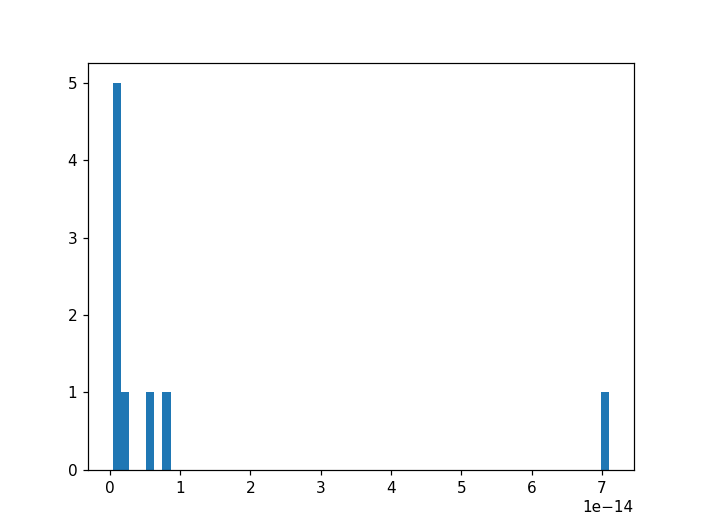

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
histograma = plt.hist(fluxes_hist,range=[min(fluxes_hist), max(fluxes_hist)], bins=60)
#plt.savefig("histograma31_col_com_erros_med_6_2.jpg")
plt.show()

<IPython.core.display.Javascript object>


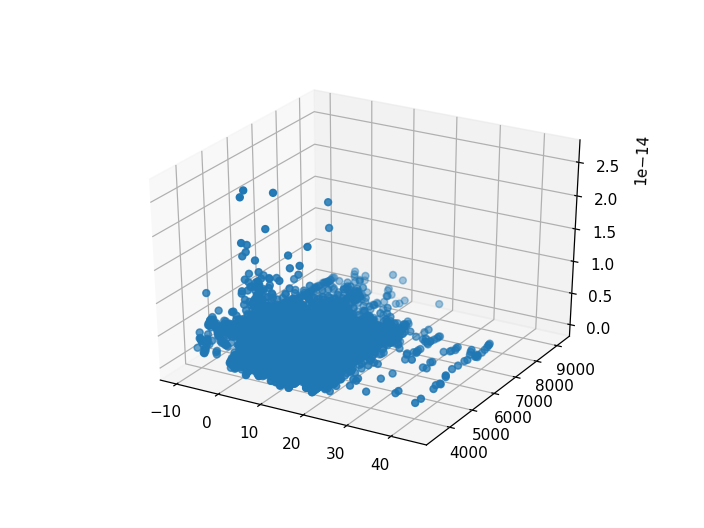

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xx_test, yy_test, mean_flux)
#ax.set_zlim3d(0,0.1e-12)
plt.show()

In [17]:
table = []
for k in range(0,len(xx_test)):
    table.append((xx_test[k], yy_test[k], mean_flux[k]))

f = open("M0.dat", 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()

In [17]:
import scipy as sp
import scipy.interpolate
spline = sp.interpolate.Rbf(xx_test,yy_test,mean_flux,function='linear')

In [18]:
x_grid = np.linspace(min(xx_test), max(xx_test), 60)
y_grid = np.linspace(min(yy_test), max(yy_test), 50)
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')

<IPython.core.display.Javascript object>


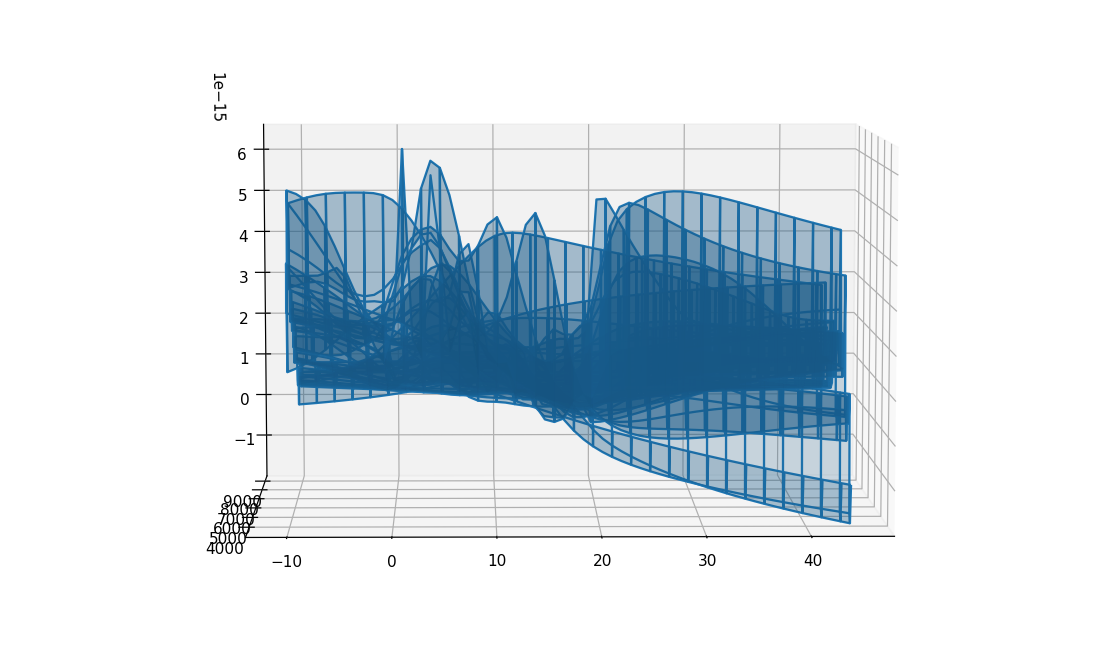

In [19]:
from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as interp
#Z = interp.griddata((xx_test,yy_test),mean_flux,(B1,B2),method='linear')
Z = spline(B1, B2)
%matplotlib notebook
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.2)
#ax.scatter3D(xx_test,yy_test,mean_flux, c='r')

plt.show()

In [20]:
tablex = []
tabley = []
tablez = []

stepx = (max(xx_test)-min(xx_test))/60
stepy = (max(yy_test)-min(yy_test))/60

gridx = min(xx_test)
while gridx < max(xx_test):
    gridy = min(yy_test)
    while gridy < max(yy_test):
        tablex.append(gridx)
        tabley.append(gridy)
        tablez.append(spline(gridx,gridy))
        
        gridy += stepy
    gridx += stepx
        

In [21]:
table = []
for k in range(0,len(tablez)):
    table.append((tablex[k], tabley[k], tablez[k]))

f = open("realM0.dat", 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()